# Bitcoin Financial Data Processing

## First we do our imports

In [371]:
import numpy as np
import os
import pickle
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import pandas.io.data as web
%matplotlib inline

## Next we collect our data from our data file, and make a pandas dataframe

In [372]:
mydata = None
try:
    mydata = pickle.load(open('modelling/stats_pickle5', 'rb'))
except:
    mydata = pickle.load(open('../resources/stats_pickle5', 'rb'))
df = pd.DataFrame(mydata, columns=["Time", "Value"])
df = df.set_index('Time')

## We can now add a column for rolling mean

In [373]:
hour = 60
hours = [1,2,6,12,18,24,36,48,96]
ranges = itertools.combinations(hours,2)
def make_plots(dataframe, time_frame):
    dataframe[str(time_frame)+"hr"] = np.round(pd.rolling_mean(df['Value'], window=time_frame*hour), 2)

for i in hours:
    make_plots(df, i)
    
df.tail()

,Value,1hr,2hr,6hr,12hr,18hr,24hr,36hr,48hr,96hr
Time,,,,,,,,,,
2015-06-24T06:31:00+00:00,154.5955,154.46,154.30,154.56,155.01,155.06,155.05,155.41,155.32,154.43
2015-06-24T06:33:00+00:00,154.5955,154.46,154.30,154.56,155.01,155.06,155.04,155.41,155.32,154.44
2015-06-24T06:34:00+00:00,154.6304,154.47,154.30,154.56,155.01,155.06,155.04,155.41,155.32,154.44
2015-06-24T06:35:00+00:00,154.6431,154.47,154.31,154.56,155.01,155.06,155.04,155.41,155.32,154.44
2015-06-24T06:36:00+00:00,154.7409,154.47,154.31,154.55,155.01,155.06,155.04,155.41,155.32,154.44


## Let's plot this coz we're cool

['Value', '1hr', '2hr', '6hr', '12hr', '18hr', '24hr', '36hr', '48hr', '96hr']


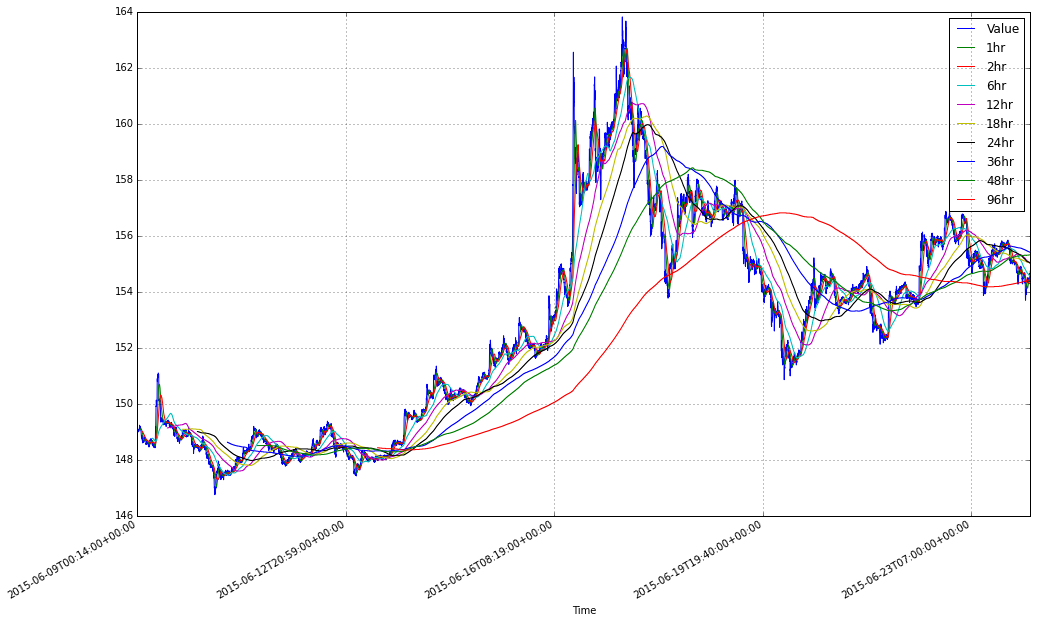

In [374]:
print(column_names)
sub = df[column_names].plot(grid=True, figsize=(16,10))
fig = sub.get_figure()
fig.autofmt_xdate()

## We make a column that tells us the difference between the two

In [375]:
ranges = itertools.combinations(hours,2)
def create_diff(dataframe, hrs):
    hr1, hr2 = hrs
    hr1 = str(hr1)+'hr'
    hr2 = str(hr2)+'hr'
    name = hr1+'-'+hr2
    dataframe[name] = dataframe[hr1] - dataframe[hr2]

for i in ranges:
    create_diff(df, i)

df.tail()

,Value,1hr,2hr,6hr,12hr,18hr,24hr,36hr,48hr,96hr,...,18hr-24hr,18hr-36hr,18hr-48hr,18hr-96hr,24hr-36hr,24hr-48hr,24hr-96hr,36hr-48hr,36hr-96hr,48hr-96hr
Time,,,,,,,,,,,,,,,,,,,,,
2015-06-24T06:31:00+00:00,154.5955,154.46,154.30,154.56,155.01,155.06,155.05,155.41,155.32,154.43,...,0.01,-0.35,-0.26,0.63,-0.36,-0.27,0.62,0.09,0.98,0.89
2015-06-24T06:33:00+00:00,154.5955,154.46,154.30,154.56,155.01,155.06,155.04,155.41,155.32,154.44,...,0.02,-0.35,-0.26,0.62,-0.37,-0.28,0.60,0.09,0.97,0.88
2015-06-24T06:34:00+00:00,154.6304,154.47,154.30,154.56,155.01,155.06,155.04,155.41,155.32,154.44,...,0.02,-0.35,-0.26,0.62,-0.37,-0.28,0.60,0.09,0.97,0.88
2015-06-24T06:35:00+00:00,154.6431,154.47,154.31,154.56,155.01,155.06,155.04,155.41,155.32,154.44,...,0.02,-0.35,-0.26,0.62,-0.37,-0.28,0.60,0.09,0.97,0.88
2015-06-24T06:36:00+00:00,154.7409,154.47,154.31,154.55,155.01,155.06,155.04,155.41,155.32,154.44,...,0.02,-0.35,-0.26,0.62,-0.37,-0.28,0.60,0.09,0.97,0.88


# The interesting bit...
## We create a "Regime" this is effectively our "Buy" or "Sell" Signal
We're going to do this on a copy of our dataframe though, just so we don't clog up our original

In [376]:
SD =0.3
name = '2hr-12hr'
df2 = df.copy(deep=True)
df2['Regime'] = np.where(df2[name] > SD, 1, 0)
df2['Regime'] = np.where(df2[name] < -SD, -1, df2['Regime'])
df2['Regime'].value_counts()

 1    8124
 0    7377
-1    5916
dtype: int64

So you see we have 6006 instances where we pass SD over the long term trend on the short term line.

## Let's plot this biotch

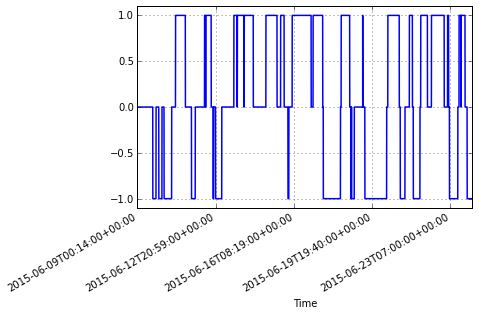

In [377]:
plota = df2['Regime'].plot(lw=1.5)
plota.set_ylim([-1.1,1.1])
plota.get_figure().autofmt_xdate()

Woop thems be our signals

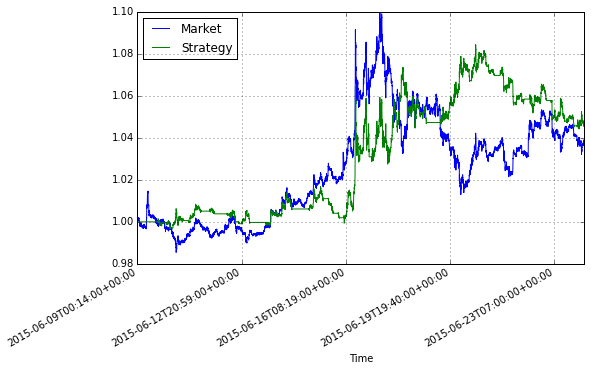

In [378]:
df2['Market'] = np.log(df2['Value']/ df2['Value'].shift(1))
df2['Strategy'] = df2['Regime'].shift(5) * df2['Market']
plotb = df2[['Market', 'Strategy']].cumsum().apply(np.exp).plot(grid=True, figsize=(8,5))
plotb.get_figure().autofmt_xdate()